# Hypothesis Testing 

Exploring the Titanic survival dataset to demonstrate **Exploratory Data Analysis (EDA)** and **Hypothesis Testing**. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_raw = pd.read_csv("data/titanic.csv")
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Structure of Data 

Small data is a small ratio of **n** to **p**. 

Where **n: number of rows** and **p: number of columns (or variables)** 

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Visualize Multiple Dimensional Data

With the following, how would we summarize this multiple dimensional, non-Linear data with a simple Linear Regression model? 

The truth is it happens all of the time in research! More on this and how using Linear and parametric models for non-Linear and complex data increases Bias and other risk in modeling system. 

<Axes: xlabel='Survived', ylabel='Parch'>

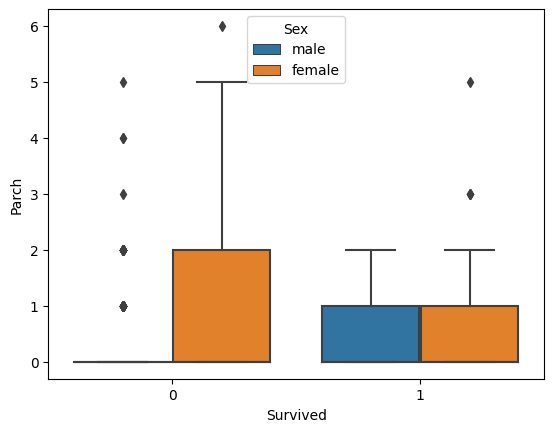

In [5]:
import seaborn as sns

sns.boxplot(x = data_raw["Survived"], y = data_raw["Parch"], hue = data_raw["Sex"])

<Axes: xlabel='Age', ylabel='Count'>

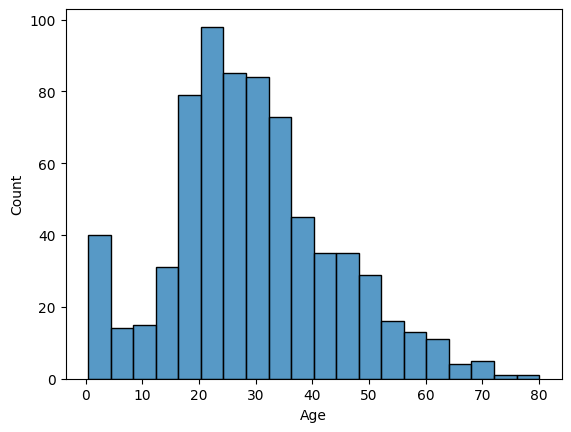

In [6]:
#plt.hist(data_raw["Age"])
sns.histplot(data_raw["Age"])


In [7]:
#

## Breakdown of Titanic Data 

#### Predicting Survivorship

We are going to predict the target **Survived**, *i.e. we are using Survived as our dependent variable.* Our target variable is dependent on the **features** of the system we are modeling. In other words, our system is the passenger population of the Titanic. There were over 2,000 people aboard the Titanic when it sank and this data set is **891 people**. Thus, just as all data sets are, this data is a sample of a population. When we perform statistical analysis of any kind, we are modeling patterns that may exist in the actual population. 

We are going to assume that the features of the data are each independent dimensions. We are assuming the boolean variable Survived is dependent on all of those independent dimensions. There are a few concepts we are going to tackle with this notebook. 

#### Concepts in this Notebook

1. Encoding non-numeric variables 
2. Parametric vs Non-parametric 
3. Type I vs II errors
4. Feature engineer: filling in missing data 
5. Feature engineer: scale and normalize data
6. Checking assumptions of parametric models


In [8]:
# Encode categorical variables into numeric 

def encode_cat_var(col):
    categories = unique(col)
    feats = {}
    for cat in categories:
        binn = (data == cat)
        feats["%s_%s" % (col.name, cat)] = binn.astype("int")
    return pd.DataFrame(feats)

def get_encoded_features(dat):
    """
        Encode categorcial features into numeric
    """
    Y = dat["Survived"]
    X = dat.drop(["Survived", "PassengerId", "Cabin", "Ticket", "Name"], axis = 1)
    X["EnSex"] = X["Sex"].apply(lambda x: 1 if x == "male" else 0)
    X["En_Q"] = X["Embarked"].apply(lambda x: 1 if x == "Q" else 0)
    X["En_C"] = X["Embarked"].apply(lambda x: 1 if x == "C" else 0)
    X["En_S"] = X["Embarked"].apply(lambda x: 1 if x == "S" else 0)
    X = X.drop(["Embarked", "Sex"], axis = 1)
    return X, Y



In [12]:
X, Y = get_encoded_features(data_raw)

In [13]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,EnSex,En_Q,En_C,En_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


### Parametric vs Nonparametric models 

In general, we make assumptions about the structure of the population where we are pulling data from (**sampling from**). Another way to say this is that we make assumptions about the distribution of the variables from the population we are making generalizations of. 

These assumptions usually come from our models, and those breakdown into two main categories: **parametric vs nonparametric models**. Parametric models are ones that assume a normal distribution in the population where data is sampled from among other assumptions. **Linear Regression** amd a lot of standard or classical statistical models are parametric. 

Non-parametric models do not assume as many things about the structure of the population where data is pulled from. Many more **complex models and analysis are nonparametric**. In a way, assuming more strict criteria about the nature of the data you are modeling allows for higher interpretability. Parametric models and analysis tend to have easier and more direct ways to interpret results. For example, many **tests that generate p-values are parametric**. These values state quite simply, whether or not there is a statistical significance in this variable for finding a pattern in the data / population. 

If you think about this, this is quite a leap from assumptions about structure of data to assumptions about how a complex system works. Nonparametric models tend to have less explanatory power in a direct way. In other words, **nonparametric models and analysis tend to be complicated or more difficult to explain**. 



### Error Types 

There are two major types of error that one can make in analysis. 

#### Type I 

These are **false-positives**. You incorrectly find significance when there is none. You believe there is a pattern when there is none. 

In terms of hypothesis testing: 

this is when you reject a null hypothesis that is actually true in a population. The null hypothesis is that there is no difference in the population between whatever you are looking at. So, in other words, you reject that there is no difference, thus, accepting that there IS a difference, when there is none. 

#### Type II 

These are **false-negatives**. You incorrectly find no significance when there is some there. You believe there is no pattern when there is one. 

In terms of hypothesis testing: 

this is when you fail to reject a null hypothesis that is actually untrue in a population. The null hypothesis is that there is no difference in the population between whatever you are looking at. So, in other words, you fail to reject that there is no difference, thus, accepting that there is no difference that is actually there. 

## Visualize Type I and II Errors

We are going to revisit this visualization below. 

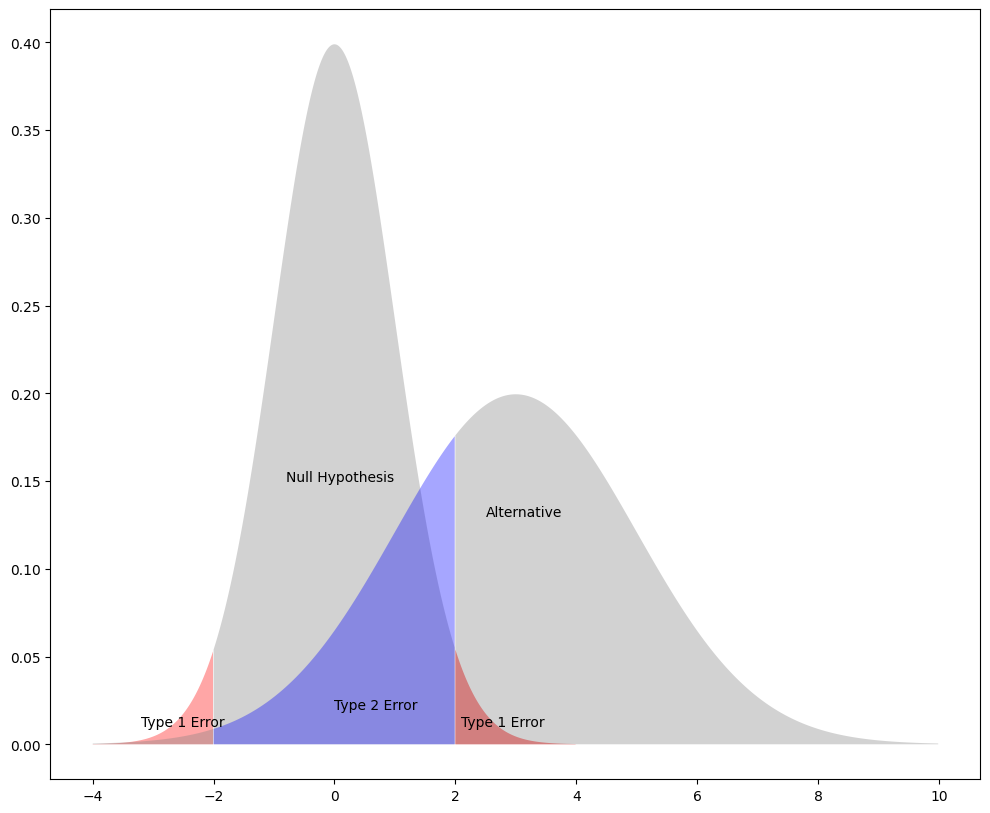

In [14]:
from scipy import stats

plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");


In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   EnSex   891 non-null    int64  
 6   En_Q    891 non-null    int64  
 7   En_C    891 non-null    int64  
 8   En_S    891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [16]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
EnSex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
En_Q,891.0,0.086420,0.281141,0.00,0.0000,0.0000,0.0,1.0000
En_C,891.0,0.188552,0.391372,0.00,0.0000,0.0000,0.0,1.0000
En_S,891.0,0.722783,0.447876,0.00,0.0000,1.0000,1.0,1.0000


In [17]:
X["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Filling in missing values 

You need to be careful with this, but a method of filling in missing values is replacing all of the missing values of a numeric column with the median value of that column. You can also alternatively use the mean (average). This is a way to not disrupt the distribution of the data or bias the explanatory power of that or other variables. 



In [18]:
X["Age"] = X["Age"].apply(lambda x: 28.0 if np.isnan(x) else x)

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
 5   EnSex   891 non-null    int64  
 6   En_Q    891 non-null    int64  
 7   En_C    891 non-null    int64  
 8   En_S    891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [20]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
EnSex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
En_Q,891.0,0.086420,0.281141,0.00,0.0000,0.0000,0.0,1.0000
En_C,891.0,0.188552,0.391372,0.00,0.0000,0.0000,0.0,1.0000
En_S,891.0,0.722783,0.447876,0.00,0.0000,1.0000,1.0,1.0000


### Assumptions of Parametric models

Linear regression and other parametric models and analysis assume a few key aspects of the population they are being used on. Namely, they assume that the variables are sampled from normal distributions. As shown below, the cost of a ticket in the Titanic dataset *(Fare variable)* is far from normally distributed. 

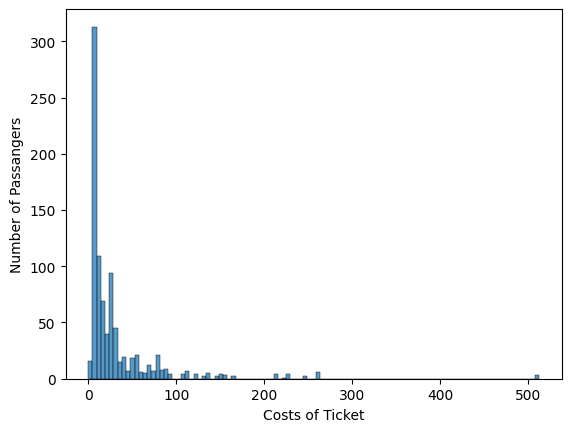

In [21]:
sns.histplot(X["Fare"])
plt.xlabel("Costs of Ticket")
plt.ylabel("Number of Passangers")
plt.show()

#### Feature Engineering: Median for Missing Values

A quick way to fill in a few missing values for a numeric column is to replace the missing values with the median value of that column. For example, **Fare** has 14 values that are 0. It could be that those passangers boarded the ship for free but I assume those values are missing. **Note: a decision to change values in the data requires way more research to backup your decision than I just did here!** 

Below I fill in the 0 values of Fare with the median value of Fare. 

The code reads as such: 
- filter X on X column "Fare" 
- for a value of 0 
- and assign that entry with 
- a value of the median value.



In [22]:
# X[X["Fare"] == 0] = np.median(X["Fare"])

### Feature Engineering: Log-transform 

As shown above, the Fare column does not follow a bell shaped curve, *i.e. it is not normally distributed*. That violates an assumption of Linear Regression and other parametric models. A way to resolve this issue is to log transform the column. 

/Users/macbookair/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


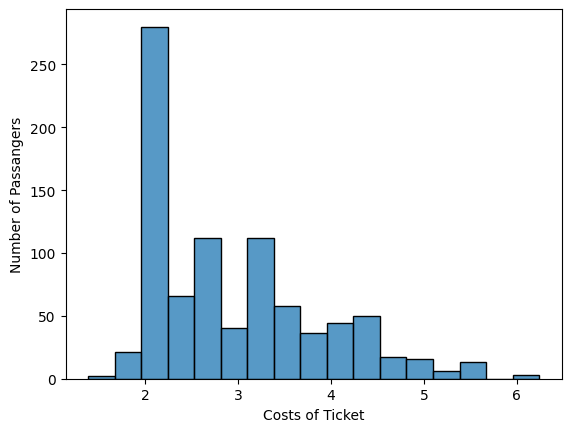

In [23]:
sns.histplot(np.log(X["Fare"]))
plt.xlabel("Costs of Ticket")
plt.ylabel("Number of Passangers")
plt.show()

### This is NOT Normal! 

The curve is *"better"* but it is still not normal. Guess what many, if not most, researchers would do...

**keep going as if it were normal!** 

I am pointing this out because it should be known that most use of our models are done despite assumptions (*i.e. requirements*) not being met. This can have cascading effects, including misleading results, both Types of Errors, and inflation of significance. 

Note the section below where we will revisit the idea of how this can effect Error Types! 

### Summary: Bias-Variance Tradeoff 

A quick overview and summary. 

High bias can lead to underfitting. 

High variance can lead to overfitting. 

### Type II Errors and Underfitting 

Type II Errors are false-negatives. That is when we find no pattern despite there actually being one. It would be when we fail to reject the null hypothesis despite there being a true difference between groups. Further, as shown above, using Linear functions on non-Linear data can result in high bias in your model, underfitting, and, thus, Type II Errors! 

I would also argue that underfitting causes Type I Errors in the same way. Think about this, if you fit a Linear Regression to some kind of curved data, you will find a pattern when there is not one in the space where your data actually curves around. Thus, Type I Error: **false-positive**. 


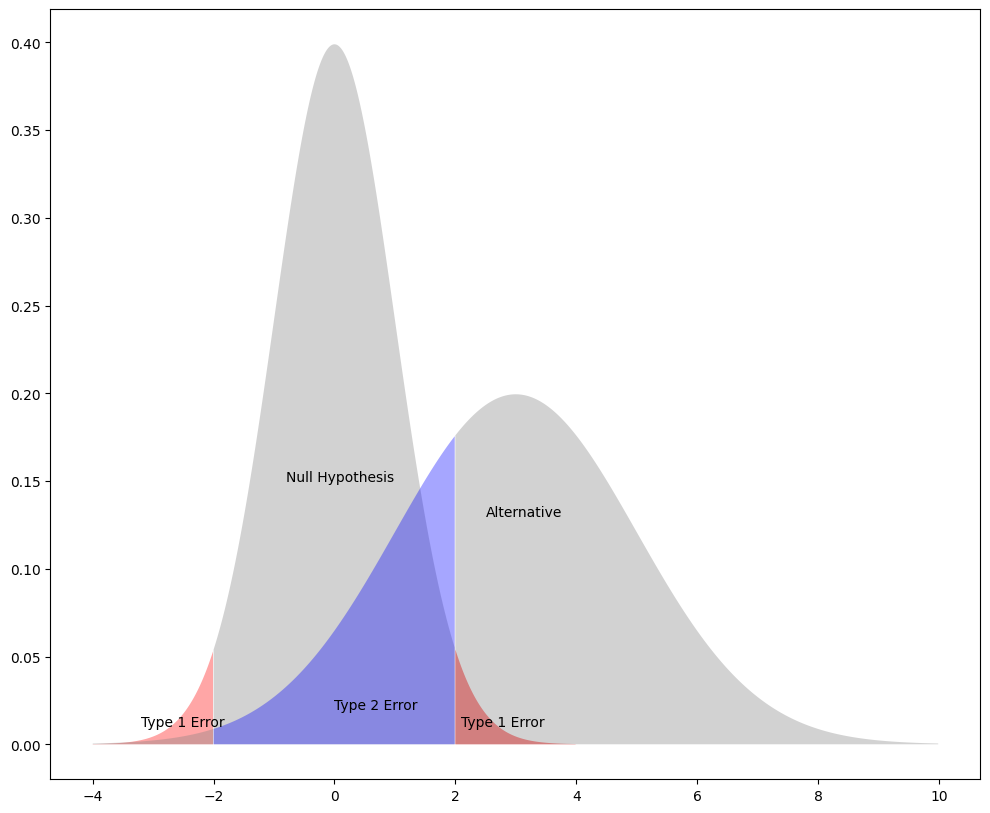

In [24]:
from scipy import stats

plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");


### What is a p-value?

Simply, the probability that the effect (*i.e. pattern*) would occur if the null hypothesis was true. The null hypothesis is that there is no difference between the groups - **e.g. no difference between means of groups A and B.** 

In the above plot, we show two situations. Think about this as a comparison of two situations showing on the same plot. 

#### How to Interpret

Interpret this plot as if it is showing the true population distribution of a group called **"Null Hypothesis"** and then another group called **"Alternative"**. The Null Hypothesis states that the two groups being compared are drawn from the same population - *i.e. both are from the Null Hypothesis distribution*. The Alternative hypothesis rejects the Null and, thus, assumes one of the groups is drawn from Null Hypothesis distribution and the other is drawn from the Alternative distribution. 

**Scenario 1: Type I Error** 

We always sample from a population. All data we analyze are samples from populations in the universe. This Titanic data is a sample of all of the actual passangers that were on the Titanic. We can perform Type I Errors (*false-positive*) if we compare groups of samples from the same distrubtion but end up capturing the extremes of the values. We find significant difference between the groups despite them being samples from the same population.

**Scenario 2: Type II Error** 

In this scenario we have a group of samples from Null Hypothesis distribution and another group of samples from Alternative distribution. We might find no significant difference between the groups due to the nature of sampling and variance. In this scenario, we can perform Type II Errors (*false-negative*). We do not find significance despite there actually being differences. 



### The Costs of Aging 

The scatterplot below shows the costs of tickets paid by the age of those that paid them. Let's look at the assumptions of Linear Regression and parametric models. 

In [27]:
#plt.scatter(X["Fare"], X["Age"])
#plt.xlabel("Cost of Ticket")
#plt.ylabel("Age of Passenger")
#plt.show()

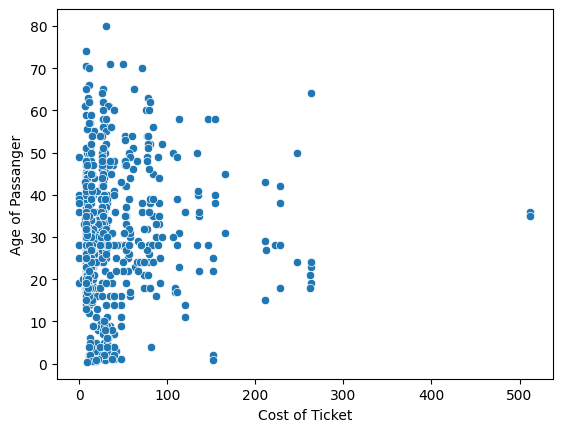

In [28]:
sns.scatterplot(x = X["Fare"], y = X["Age"])
plt.xlabel("Cost of Ticket")
plt.ylabel("Age of Passanger")
plt.show()

/Users/macbookair/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Fare', ylabel='Age'>

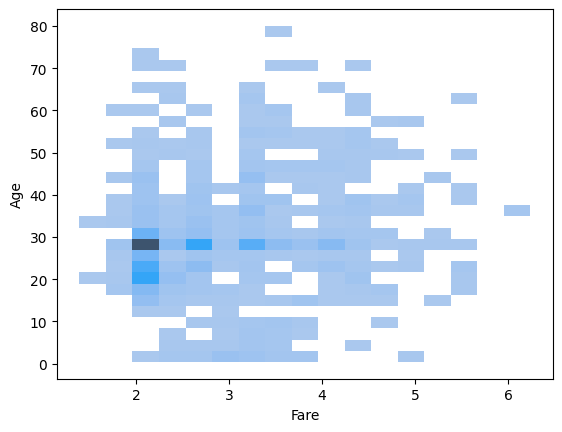

In [29]:
sns.histplot(x=np.log(X["Fare"]), y=X["Age"])

## Assumptions of Linear Regression 

One of the assumptions of Linear Regression is an absence of **multicollinearity**. Although this is explicit to Linear Regression, it is implicit to the quality of many models and various forms of analysis. Multicollinearity is the idea that a variable is impacting another variable(s). A way to quantify this is a metric known as the **Variance Inflation Factor**. 

As the name implies, the VIF is a measure of how much the behavior, *i.e. variance*, of an independent variable is being impacted or inflated by other independent variables. Here is a clear example: 

Imagine you have a dataset of salaries based on various people. Some of the data about the people include their age and their years of experience working. Notice: you cannot have 20 years of experience working if you are only 18 years old. Along this logic, you can see how age and years of experience working are two independent variables that are highly correlated. Moreso, years of experience is a function of age. 



In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Pclass,14.806711
1,Age,7.074513
2,SibSp,1.573303
3,Parch,1.631310
4,Fare,2.298555
5,EnSex,3.204204
6,En_Q,3.897000
7,En_C,5.998448
8,En_S,21.487085


### PClass has high VIF 

PClass has a ton of interaction with other independent variables and should therefore be removed. Afterwards, we check the VIF of the whole dataset (feature by feature) again. 

In [34]:
X.drop("Pclass", axis = 1, inplace = True)

In [35]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Age,6.511407
1,SibSp,1.558931
2,Parch,1.615669
3,Fare,1.706425
4,EnSex,3.158837
5,En_Q,1.578023
6,En_C,2.667378
7,En_S,7.337801


## Curse of Complexity

In Science, we are constantly making simplier models of more complex systems. For example, a **t-test** is a statistical test for finding a statistically significant difference in means of two groups. This might seem obvious, but the entries or data points in each group are more than just a mean and average amount of variance. When we perform a **t-test** (*and many other statistical tests for that matter*), we are simply modeling each group of data points as an average value and average amount of variance between all of the intra-group points. The actual system, *i.e. the data points of each group*, is a more complex story. 

A common issue that arises - though, not discussed as often as I would like - is the amount of bias we are injecting into our model when we use relatively simple models for relatively complex or high-dimensional systems. Namely, the many assumptions of Linear Regression (*and other parametric tests*) are not met fully or completely in many instances where it is used. Worse is when Linear Regression is used to model a system that is not Linear. Using a Linear function to model a non-Linear system is a way to add high bias into your model and potentially **underfit** the data.  

In [43]:
XYdata = X 
XYdata["Survived"] = Y
XYdata.head()

,Age,SibSp,Parch,Fare,EnSex,En_Q,En_C,En_S,Survived
0,22.0,1,0,7.2500,1,0,0,1,0
1,38.0,1,0,71.2833,0,0,1,0,1
2,26.0,0,0,7.9250,0,0,0,1,1
3,35.0,1,0,53.1000,0,0,0,1,1
4,35.0,0,0,8.0500,1,0,0,1,0


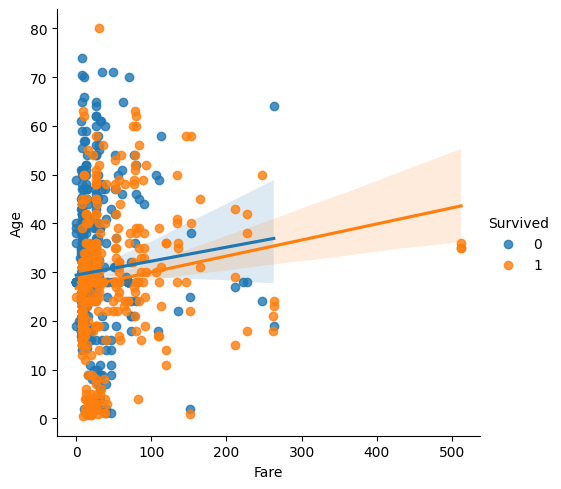

In [44]:
sns.lmplot(x = "Fare", y = "Age", hue = "Survived", data = XYdata)

## Underfitting in the Flesh  

The above is an example of what can happen when we try to use simple models to gain insight into relatively complex data. I know the above looks chaotic but I can assure you that these sort of mistakes in analysis happen in: **government analysis, news, science research, people's logic during debates,** and the list goes on and on. 

### Interpret Chaos

The above is two Linear Regressions performed on two groups of **Age** and **Fare** data. The two groups were those that survived and those that did not. This data does not meet two of the important assumptions of Linear Regression: normal distribution of the variables and homogeneity of the variance of the variables. Thus, Linear Regression should never have been used. But let's say it was. 

These lines are supposed to give you insight into the trend between the age of someone, how much they paid, and if they survived or not. In addition to the complexity issue from this being non-Linear data being forced into a Linear model, there are obvious issues with outliers. Outliers, far right orange dots of extremely expensive fares, add layers of complexity in the distribution of data, the summary statistics, and the trends being forced to the data. 

This example gives a lot of visual cues that something was not correct in the analysis and modeling of the data. That is why I used this. And to show that sometimes these are the sort of models that are performed and then we just get summary statistics about. 

### High Bias 

These Linear Regression models plotted here are extreme examples of simple models being forced on highly complex data. This dramatically increases bias and, thus, potential to be underfitting the data. In other words, failing to capture the actual pattern that exists...**i.e. false negative = Type II Error**. 